## Imports

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [3]:
np.set_printoptions(precision=4)

### Basic Functions

In [4]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

In [5]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

Text(0, 0.5, 'output')

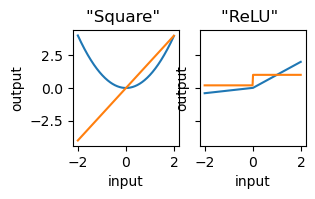

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(3, 1.5))  # 2 Rows, 1 Col / figsize=(6, 3)

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, deriv(square, input_range))
ax[0].set_title('"Square" ')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, deriv(leaky_relu, input_range))
ax[1].set_title('"ReLU" ')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')



# Chain

In [7]:
from typing import List
# Eine Funktion übernimmt ein ndarray als Argument und erzeugt ein ndarray.
Array_Function = Callable[[ndarray], ndarray]
# Eine Kette (Chain) ist eine Liste mit Funktionen.
Chain = List[Array_Function]

In [8]:
def chain_length_2(chain: Chain, x: ndarray) -> ndarray:
    '''
    Wertet zwei Funktionen nacheinander als "Kette" aus.
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"
    f1 = chain[0]
    f2 = chain[1]
    return f2(f1(x))


In [18]:
def f1( x: ndarray):
    return x + 2

def f2(x: ndarray):
    return x * x

chain_1 = [f1, f2]
print(chain_1)

input_range = np.arange(-2, 2, 0.1)
chain_length_2(chain_1,input_range)

[<function f1 at 0x0000012A8B8A2EE0>, <function f2 at 0x0000012A8B8A2D30>]


array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
       3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
       1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
       3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
       5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
       9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
       1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01])